In [1]:
import gzip

# https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home
# https://drive.google.com/uc?id=1LXpK1UfqtP89H1tYy0pBGHjYk8IhigUK
with gzip.open("goodreads_books.json.gz") as f:
    line = f.readline()

In [2]:
# View line of data
line

b'{"isbn": "0312853122", "text_reviews_count": "1", "series": [], "country_code": "US", "language_code": "", "popular_shelves": [{"count": "3", "name": "to-read"}, {"count": "1", "name": "p"}, {"count": "1", "name": "collection"}, {"count": "1", "name": "w-c-fields"}, {"count": "1", "name": "biography"}], "asin": "", "is_ebook": "false", "average_rating": "4.00", "kindle_asin": "", "similar_books": [], "description": "", "format": "Paperback", "link": "https://www.goodreads.com/book/show/5333265-w-c-fields", "authors": [{"author_id": "604031", "role": ""}], "publisher": "St. Martin\'s Press", "num_pages": "256", "publication_day": "1", "isbn13": "9780312853129", "publication_month": "9", "edition_information": "", "publication_year": "1984", "url": "https://www.goodreads.com/book/show/5333265-w-c-fields", "image_url": "https://images.gr-assets.com/books/1310220028m/5333265.jpg", "book_id": "5333265", "ratings_count": "3", "work_id": "5400751", "title": "W.C. Fields: A Life on Film", "t

In [3]:
import json

# View line of data in JSON format
data = json.loads(line)
data

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [4]:
def parse_fields(line):
    data = json.loads(line)
    return {
        "book_id": data["book_id"], 
        "title": data["title_without_series"], 
        "num_ratings": data["ratings_count"], 
        "url": data["url"], 
        "cover_image": data["image_url"],
        "country_code": data["country_code"],
        "language_code": data["language_code"],
        "average_rating": data["average_rating"],
        "publisher": data["publisher"],
        "num_pages": data["num_pages"],
        "publication_year": data["publication_year"]
    }

In [5]:
# Read dataset line by line to reduce computational overhead (dataset is loaded into memory as needed)

import time

book_info_list = []

tick = time.perf_counter()
with gzip.open("goodreads_books.json.gz") as f:
    while True:
        line = f.readline()
        if not line:
            break
        fields = parse_fields(line)
        try:
            num_ratings = int(fields["num_ratings"])
        except ValueError:
            continue
        if num_ratings > 50:
            book_info_list.append(fields)
tock = time.perf_counter()

In [6]:
# Amount of time it took to read dataset line by line
elapsed_time_s = int(tock - tick)
m, s = divmod(elapsed_time_s, 60)
print("elapsed time = " + str(m) + " minutes and " + str(s) + " seconds")

elapsed time = 3 minutes and 36 seconds


In [7]:
import pandas as pd

# Clean up columns
# Convert types

book_info_df = pd.DataFrame.from_dict(book_info_list)

book_info_df["num_ratings"] = pd.to_numeric(book_info_df["num_ratings"])
book_info_df["average_rating"] = pd.to_numeric(book_info_df["average_rating"])
book_info_df["num_pages"] = pd.to_numeric(book_info_df["num_pages"])
book_info_df["publication_year"] = pd.to_numeric(book_info_df["publication_year"])

book_info_df["mod_title"] = book_info_df["title"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
book_info_df["mod_title"] = book_info_df["mod_title"].str.lower()
book_info_df["mod_title"] = book_info_df["mod_title"].str.replace("\s+", " ", regex=True)
book_info_df = book_info_df[book_info_df["mod_title"].str.len() > 0]

book_info_df["country_code"] = book_info_df["country_code"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
book_info_df["country_code"] = book_info_df["country_code"].str.lower()
book_info_df["country_code"] = book_info_df["country_code"].str.replace("\s+", " ", regex=True)

book_info_df["language_code"] = book_info_df["language_code"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
book_info_df["language_code"] = book_info_df["language_code"].str.lower()
book_info_df["language_code"] = book_info_df["language_code"].str.replace("\s+", " ", regex=True)

book_info_df["publisher"] = book_info_df["publisher"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
book_info_df["publisher"] = book_info_df["publisher"].str.lower()
book_info_df["publisher"] = book_info_df["publisher"].str.replace("\s+", " ", regex=True)

In [8]:
book_info_df

,book_id,title,num_ratings,url,cover_image,country_code,language_code,average_rating,publisher,num_pages,publication_year,mod_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,us,eng,4.03,nelson doubleday inc,600.0,1987.0,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,us,eng,3.49,atria books,368.0,2009.0,best friends forever
2,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,us,,4.22,seven seas,216.0,2009.0,alls fairy in love and war avalon web of magic 8
3,287149,The Devil's Notebook,986,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,us,,3.81,feral house,147.0,2000.0,the devils notebook
4,6066814,"Crowner Royal (Crowner John Mystery, #13)",186,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,us,,3.93,simon schuster uk,400.0,2009.0,crowner royal crowner john mystery 13
...,...,...,...,...,...,...,...,...,...,...,...,...
753555,15734522,Why You're Not Married . . . Yet: The Straight...,101,https://www.goodreads.com/book/show/15734522-w...,https://images.gr-assets.com/books/1341351347m...,us,enus,3.79,ballantine books,224.0,2012.0,why youre not married yet the straight talk yo...
753556,1370179,The Brazilian Boss's Innocent Mistress,240,https://www.goodreads.com/book/show/1370179.Th...,https://s.gr-assets.com/assets/nophoto/book/11...,us,,3.51,harlequin,192.0,2007.0,the brazilian bosss innocent mistress
753557,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://www.goodreads.com/book/show/17805813-o...,https://images.gr-assets.com/books/1379766592m...,us,engb,4.02,,84.0,2013.0,ondine ondine quartet 05
753558,2685097,The Spaniard's Blackmailed Bride,112,https://www.goodreads.com/book/show/2685097-th...,https://s.gr-assets.com/assets/nophoto/book/11...,us,,3.42,harlequin,192.0,2007.0,the spaniards blackmailed bride


In [9]:
# All books seem to have country code us
book_info_df["country_code"].value_counts

<bound method IndexOpsMixin.value_counts of 0         us
1         us
2         us
3         us
4         us
          ..
753555    us
753556    us
753557    us
753558    us
753559    us
Name: country_code, Length: 750505, dtype: object>

In [10]:
# Do not include country code in set of features because it is the same for each data point or book
book_info_df.country_code.nunique()

1

In [11]:
# Drop country code column
book_info_df = book_info_df.drop('country_code', axis=1)

In [12]:
# Test change
book_info_df

,book_id,title,num_ratings,url,cover_image,language_code,average_rating,publisher,num_pages,publication_year,mod_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,eng,4.03,nelson doubleday inc,600.0,1987.0,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,eng,3.49,atria books,368.0,2009.0,best friends forever
2,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,,4.22,seven seas,216.0,2009.0,alls fairy in love and war avalon web of magic 8
3,287149,The Devil's Notebook,986,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,,3.81,feral house,147.0,2000.0,the devils notebook
4,6066814,"Crowner Royal (Crowner John Mystery, #13)",186,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,,3.93,simon schuster uk,400.0,2009.0,crowner royal crowner john mystery 13
...,...,...,...,...,...,...,...,...,...,...,...
753555,15734522,Why You're Not Married . . . Yet: The Straight...,101,https://www.goodreads.com/book/show/15734522-w...,https://images.gr-assets.com/books/1341351347m...,enus,3.79,ballantine books,224.0,2012.0,why youre not married yet the straight talk yo...
753556,1370179,The Brazilian Boss's Innocent Mistress,240,https://www.goodreads.com/book/show/1370179.Th...,https://s.gr-assets.com/assets/nophoto/book/11...,,3.51,harlequin,192.0,2007.0,the brazilian bosss innocent mistress
753557,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://www.goodreads.com/book/show/17805813-o...,https://images.gr-assets.com/books/1379766592m...,engb,4.02,,84.0,2013.0,ondine ondine quartet 05
753558,2685097,The Spaniard's Blackmailed Bride,112,https://www.goodreads.com/book/show/2685097-th...,https://s.gr-assets.com/assets/nophoto/book/11...,,3.42,harlequin,192.0,2007.0,the spaniards blackmailed bride


In [13]:
# Seems to be different types of English
book_info_df["language_code"].value_counts

<bound method IndexOpsMixin.value_counts of 0          eng
1          eng
2             
3             
4             
          ... 
753555    enus
753556        
753557    engb
753558        
753559     eng
Name: language_code, Length: 750505, dtype: object>

In [14]:
book_info_df.language_code.nunique()

120

<AxesSubplot:ylabel='language_code'>

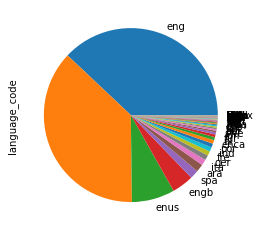

In [15]:
book_info_df['language_code'].value_counts().plot(kind='pie')

In [16]:
aString = "hello world"
aString.startswith("hello")

True

In [17]:
# Group/unify variants of English labels
book_info_df['language_code'] = book_info_df.language_code.apply(lambda x: "eng" if x.startswith('en') else x)

In [18]:
book_info_df

,book_id,title,num_ratings,url,cover_image,language_code,average_rating,publisher,num_pages,publication_year,mod_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,eng,4.03,nelson doubleday inc,600.0,1987.0,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,eng,3.49,atria books,368.0,2009.0,best friends forever
2,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,,4.22,seven seas,216.0,2009.0,alls fairy in love and war avalon web of magic 8
3,287149,The Devil's Notebook,986,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,,3.81,feral house,147.0,2000.0,the devils notebook
4,6066814,"Crowner Royal (Crowner John Mystery, #13)",186,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,,3.93,simon schuster uk,400.0,2009.0,crowner royal crowner john mystery 13
...,...,...,...,...,...,...,...,...,...,...,...
753555,15734522,Why You're Not Married . . . Yet: The Straight...,101,https://www.goodreads.com/book/show/15734522-w...,https://images.gr-assets.com/books/1341351347m...,eng,3.79,ballantine books,224.0,2012.0,why youre not married yet the straight talk yo...
753556,1370179,The Brazilian Boss's Innocent Mistress,240,https://www.goodreads.com/book/show/1370179.Th...,https://s.gr-assets.com/assets/nophoto/book/11...,,3.51,harlequin,192.0,2007.0,the brazilian bosss innocent mistress
753557,17805813,"Ondine (Ondine Quartet, #0.5)",327,https://www.goodreads.com/book/show/17805813-o...,https://images.gr-assets.com/books/1379766592m...,eng,4.02,,84.0,2013.0,ondine ondine quartet 05
753558,2685097,The Spaniard's Blackmailed Bride,112,https://www.goodreads.com/book/show/2685097-th...,https://s.gr-assets.com/assets/nophoto/book/11...,,3.42,harlequin,192.0,2007.0,the spaniards blackmailed bride


In [19]:
# Number of language labels reduced
book_info_df.language_code.nunique()

115

<AxesSubplot:ylabel='language_code'>

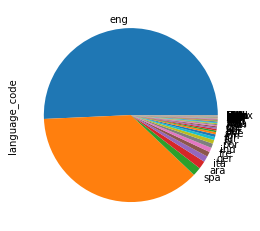

In [20]:
# Many books do not have a language code, but we do not want to remove them, because language code is not a feature for collaborative filtering or classification models
book_info_df['language_code'].value_counts().plot(kind='pie')

In [21]:
book_by_lang_percentage = book_info_df.language_code.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

In [22]:
# Most books are in English
book_by_lang_percentage

eng    50.7%
       37.2%
spa     1.6%
ara     1.5%
ita     1.1%
       ...  
ang     0.0%
arw     0.0%
din     0.0%
jav     0.0%
ira     0.0%
Name: language_code, Length: 115, dtype: object

<AxesSubplot:>

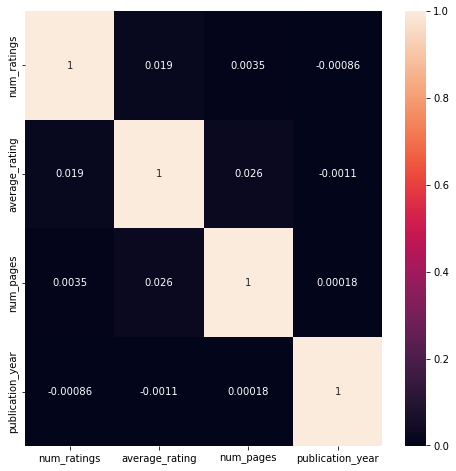

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# As expected, no correlation among features
plt.figure(figsize=(8,8))
sns.heatmap(book_info_df.corr(), color='b', annot=True)

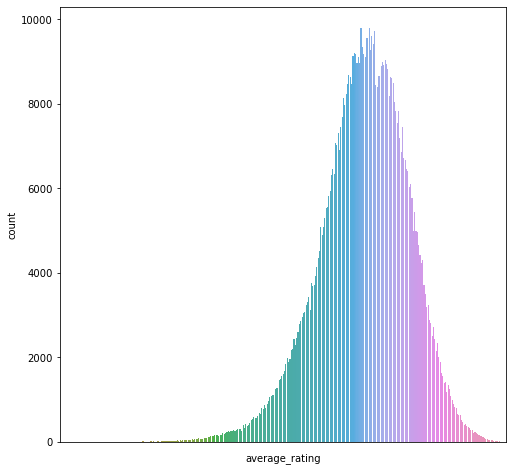

In [24]:
# Users are more likely to rate books that they like instead of books that they do not like

plt.figure(figsize=(8,8))
plot = sns.countplot(x='average_rating', data=book_info_df)

plot.set(xticklabels=[])  
plot.tick_params(bottom=False) # remove the ticks

plt.show()

In [25]:
book_info_df.to_json("book_info_df.json")

# Scratch

In [26]:
column_names_list = book_info_df.columns.values.tolist()
column_names_list

['book_id',
 'title',
 'num_ratings',
 'url',
 'cover_image',
 'language_code',
 'average_rating',
 'publisher',
 'num_pages',
 'publication_year',
 'mod_title']

In [27]:
for col in book_info_df:
    print(book_info_df[col])

0          7327624
1          6066819
2          6066812
3           287149
4          6066814
            ...   
753555    15734522
753556     1370179
753557    17805813
753558     2685097
753559    22017381
Name: book_id, Length: 750505, dtype: object
0         The Unschooled Wizard (Sun Wolf and Starhawk, ...
1                                      Best Friends Forever
2         All's Fairy in Love and War (Avalon: Web of Ma...
3                                      The Devil's Notebook
4                 Crowner Royal (Crowner John Mystery, #13)
                                ...                        
753555    Why You're Not Married . . . Yet: The Straight...
753556               The Brazilian Boss's Innocent Mistress
753557                        Ondine (Ondine Quartet, #0.5)
753558                     The Spaniard's Blackmailed Bride
753559            101 Nights: Volume One (101 Nights, #1-3)
Name: title, Length: 750505, dtype: object
0           140
1         51184
2          

In [28]:
book_info_df.num_ratings.nunique()

18567

In [29]:
book_info_df.num_ratings.unique()

array([  140, 51184,    98, ..., 11102, 19708, 13221], dtype=int64)

array([[<AxesSubplot:title={'center':'num_ratings'}>,
        <AxesSubplot:title={'center':'average_rating'}>],
       [<AxesSubplot:title={'center':'num_pages'}>,
        <AxesSubplot:title={'center':'publication_year'}>]], dtype=object)

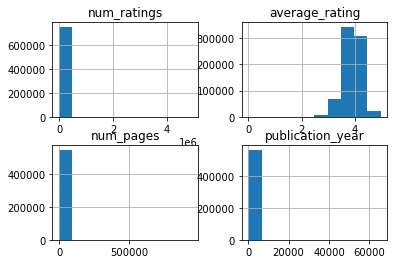

In [30]:
book_info_df.hist()

In [31]:
book_info_df['num_ratings'].max()

4899965

In [32]:
book_info_df['num_ratings'].idxmax()

164376

In [33]:
book_info_df[book_info_df['num_ratings'] == book_info_df['num_ratings'].max()]

,book_id,title,num_ratings,url,cover_image,language_code,average_rating,publisher,num_pages,publication_year,mod_title
164376,2767052,"The Hunger Games (The Hunger Games, #1)",4899965,https://www.goodreads.com/book/show/2767052-th...,https://images.gr-assets.com/books/1447303603m...,eng,4.34,scholastic press,374.0,2008.0,the hunger games the hunger games 1


In [34]:
book_info_df[book_info_df['num_ratings'] == book_info_df['num_ratings'].min()]

,book_id,title,num_ratings,url,cover_image,language_code,average_rating,publisher,num_pages,publication_year,mod_title
28,13571772,Captain America: Winter Soldier (The Ultimate ...,51,https://www.goodreads.com/book/show/13571772-c...,https://images.gr-assets.com/books/1333287305m...,eng,4.28,hachette partworks ltd,146.0,2012.0,captain america winter soldier the ultimate gr...
42,707611,"Superman Archives, Vol. 2",51,https://www.goodreads.com/book/show/707611.Sup...,https://images.gr-assets.com/books/1307838888m...,eng,4.06,dc comics,272.0,1997.0,superman archives vol 2
50,23272157,Beautee and the Beast,51,https://www.goodreads.com/book/show/23272157-b...,https://images.gr-assets.com/books/1411691914m...,eng,4.29,jessica watkins presents,129.0,2014.0,beautee and the beast
121,958987,Toothpick House,51,https://www.goodreads.com/book/show/958987.Too...,https://images.gr-assets.com/books/1259741154m...,eng,4.00,naiad press,256.0,1983.0,toothpick house
123,34404230,Fire In The Water,51,https://www.goodreads.com/book/show/34404230-f...,https://s.gr-assets.com/assets/nophoto/book/11...,,3.67,,NaN,NaN,fire in the water
...,...,...,...,...,...,...,...,...,...,...,...
753349,166174,"A Completion of Sanditon, Jane Austen's Unfini...",51,https://www.goodreads.com/book/show/166174.A_C...,https://s.gr-assets.com/assets/nophoto/book/11...,,2.98,,NaN,NaN,a completion of sanditon jane austens unfinish...
753372,992050,Pontoon,51,https://www.goodreads.com/book/show/992050.Pon...,https://s.gr-assets.com/assets/nophoto/book/11...,,3.54,highbridge company,8.0,2007.0,pontoon
753405,35482322,Promising My Love to a Boss 3,51,https://www.goodreads.com/book/show/35482322-p...,https://s.gr-assets.com/assets/nophoto/book/11...,,4.73,,NaN,NaN,promising my love to a boss 3
753437,335376,How to Give Your Baby Encyclopedic Knowledge: ...,51,https://www.goodreads.com/book/show/335376.How...,https://images.gr-assets.com/books/1356129191m...,,4.22,square one publishers,282.0,2006.0,how to give your baby encyclopedic knowledge t...


In [35]:
book_info_df.describe()

,num_ratings,average_rating,num_pages,publication_year
count,7.505050e+05,750505.000000,550597.000000,563692.000000
mean,1.246254e+03,3.901987,290.446831,2007.595504
std,1.970423e+04,0.331902,1289.306507,159.825709
min,5.100000e+01,0.000000,0.000000,0.000000
25%,8.200000e+01,3.700000,182.000000,2004.000000
50%,1.530000e+02,3.920000,274.000000,2010.000000
75%,3.980000e+02,4.130000,368.000000,2013.000000
max,4.899965e+06,4.960000,945077.000000,65535.000000
